# The aim of this notebook is to get an intuition of the sobel operator and the gradient of an image.

## In this section we will get the gradient in either x-direction or y-direction (through sobel kernel)

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

### Expected result for a Threshold in "x" orientation

![](https://github.com/CheloGE/CarND-Tinker_with_Sobel_operator/blob/master/thresh-x-example.png?raw=1)

In [0]:
# This function applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=20, thresh_max=100
# should produce output like the example image shown above this quiz.
def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    if orient == 'x':
        sobel = cv2.Sobel(gray_img, ddepth=cv2.CV_64F, dx=1,dy=0) 
    elif orient == 'y':
        sobel = cv2.Sobel(gray_img, ddepth=cv2.CV_64F, dx=0,dy=1) 
    else:
        return -1
    # 3) Take the absolute value of the derivative or gradient
    abs_sobel = np.absolute(sobel)
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    mask = np.zeros_like(scaled_sobel)
    mask[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1
    # 6) Return this mask as your binary_output image
    binary_output = mask # Remove this line
    return binary_output
    


In the above code the ```Sobel``` function parameter ```ddepth``` refers to the output image depth
In this case CV_64F is passed because we want a double data type. Please refer to all data types of Matrices to the following chart: 
![](https://github.com/CheloGE/CarND-Tinker_with_Sobel_operator/blob/master/Capture.JPG?raw=1)

* Reference: [link](https://stackoverflow.com/questions/25494152/what-is-the-meaning-of-matrix-type-in-opencv)

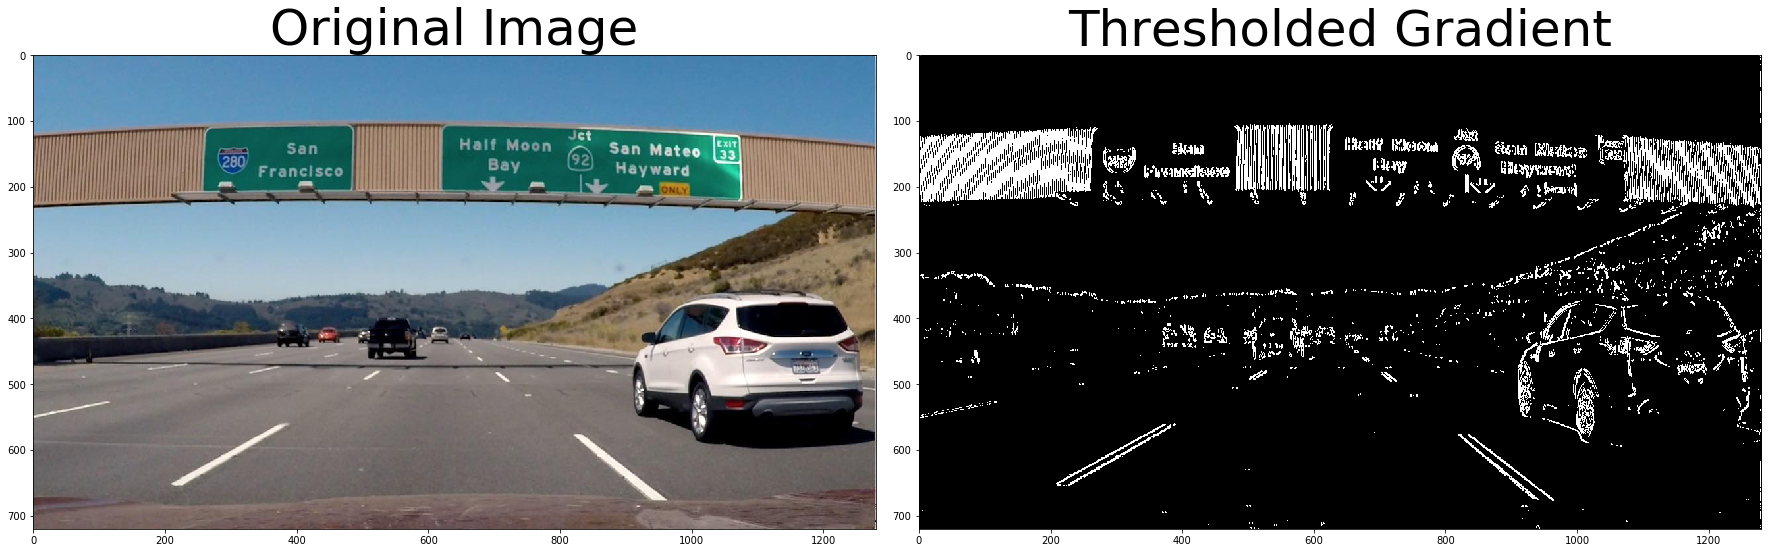

In [10]:
# Read in an image and grayscale it
image = mpimg.imread('signs_vehicles_xygrad.png')

# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh_min=20, thresh_max=100)
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## In this section we will get the magnitude of the gradient